In [1]:
#EXAMPLES
#https://machinelearningmastery.com/sequence-classification-lstm-recurrent-neural-networks-python-keras/
#https://towardsdatascience.com/multi-class-text-classification-with-lstm-using-tensorflow-2-0-d88627c10a35
#https://towardsdatascience.com/language-translation-with-rnns-d84d43b40571
#https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/

#FOR BUILDING THE MODEL
#https://www.youtube.com/watch?v=vPrSca-YjFg

#FOR LABELLING
#https://www.pyimagesearch.com/2018/05/07/multi-label-classification-with-keras/
#https://docs.scipy.org/doc/numpy/reference/generated/numpy.expand_dims.html

In [2]:
import os
import pretty_midi
import numpy as np
import math
import random
import matplotlib.pyplot as plt
import sys

In [4]:
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Bidirectional
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
# fix random seed for reproducibility
np.random.seed(7)

Using TensorFlow backend.


In [5]:
workdir = "C:\\Users\\toend\\Documents\\ITU\\Thesis"
sys.path.append(workdir + '\\Code\\Utils')
from Utils import getDataSets

In [6]:
X1, X2, X3, X4 = getDataSets(workdir)
X = np.concatenate((X1, X2, X3, X4))

In [7]:
Y1 = np.zeros((len(X1), 4))
Y2 = np.zeros((len(X2), 4))
Y3 = np.zeros((len(X3), 4))
Y4 = np.zeros((len(X4), 4))

for i in range(0, len(Y1)):
    Y1[i] = [1, 0, 0, 0]
    
for i in range(0, len(Y2)):
    Y2[i] = [0, 1, 0, 0]
    
for i in range(0, len(Y3)):
    Y3[i] = [0, 0, 1, 0]
    
for i in range(0, len(Y4)):
    Y4[i] = [0, 0, 0, 1]

Y = np.concatenate((Y1, Y2, Y3, Y4))
print(Y.shape)

(510, 4)


In [8]:
Z = list(zip(X, Y))

random.shuffle(Z)

X, Y = zip(*Z)

print(np.array(X).shape)
print(np.array(Y).shape)

(510, 3000, 128)
(510, 4)


In [9]:
validationX = X[500:]
validationY = Y[500:]

print(np.array(validationX).shape)
print(np.array(validationY).shape)

X = X[:500]
Y = Y[:500]

print(np.array(X).shape)
print(np.array(Y).shape)

(10, 3000, 128)
(10, 4)
(500, 3000, 128)
(500, 4)


In [10]:
XhalfingPoint = int(len(X)/100*80)

X_train = np.array(X[:XhalfingPoint])
print(X_train.shape)
X_test = np.array(X[XhalfingPoint:])
print(X_test.shape)

YhalfingPoint = int(len(Y)/100*80)

y_train = np.array(Y[:YhalfingPoint])
print(y_train.shape)
y_test = np.array(Y[YhalfingPoint:])
print(y_test.shape)

(400, 3000, 128)
(100, 3000, 128)
(400, 4)
(100, 4)


In [12]:
model = Sequential()
model.add(LSTM(128, input_shape=X_train.shape[1:]))
model.add(Dense(4, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Save model
model.save('LSTMclassifier.h5')
print(model.summary())
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=64)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 516       
Total params: 132,100
Trainable params: 132,100
Non-trainable params: 0
_________________________________________________________________
None
Train on 400 samples, validate on 100 samples
Epoch 1/20
400/400 [==============================] - 94s 234ms/step - loss: 0.6875 - accuracy: 0.5962 - val_loss: 0.6595 - val_accuracy: 0.7525
Epoch 2/20
400/400 [==============================] - 105s 261ms/step - loss: 0.6161 - accuracy: 0.7469 - val_loss: 0.5644 - val_accuracy: 0.7500
Epoch 3/20
400/400 [==============================] - 116s 289ms/step - loss: 0.5505 - accuracy: 0.7500 - val_loss: 0.5479 - val_accuracy: 0.7500
Epoch 4/20
400/400 [==

In [ ]:
# load model
model = load_model('LSTMclassifier.h5')
# summarize model.
model.summary()

In [40]:
pred = model.predict(np.array(validationX))

In [44]:
accr = model.evaluate(X_test,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

12/12 [==============================] - 1s 51ms/step
Test set
  Loss: 1.581
  Accuracy: 0.333


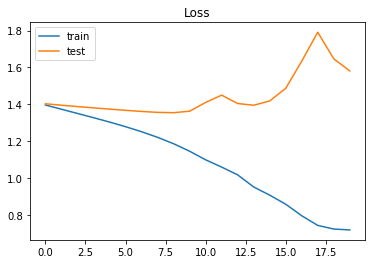

In [52]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

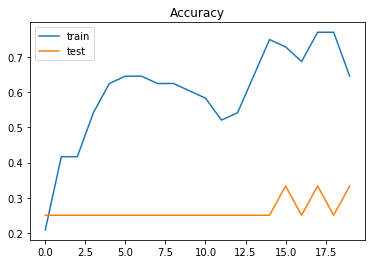

In [50]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

In [53]:
print(pred)

[[0.4961242  0.14102183 0.3021725  0.0606814 ]
 [0.50001395 0.28623566 0.16718067 0.04656972]
 [0.68692875 0.11382861 0.1617652  0.03747737]
 [0.3622637  0.4389045  0.13884324 0.05998853]
 [0.2129954  0.18152215 0.20792924 0.3975533 ]
 [0.32422587 0.5771092  0.07221302 0.02645185]
 [0.22010687 0.22638954 0.16837388 0.38512975]]


In [42]:
print(validationY)

(array([0., 1., 0., 0.]), array([0., 1., 0., 0.]), array([0., 1., 0., 0.]), array([0., 1., 0., 0.]), array([0., 1., 0., 0.]), array([1., 0., 0., 0.]), array([0., 1., 0., 0.]))
